In [1]:
%cd ..

c:\Users\shuduo\Documents\GitHub\python__optical-bubble-identification


In [94]:
from torch.utils.data import Dataset 
import os 
import json
import numpy as np
import skimage
import cv2 
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [65]:
class BubbleDotLabel(Dataset): 
    def __init__(self, 
                 data_path = 'data/image/haima_bubble_seg_dataset',
                 label_path = 'data/image/haima_bubble_seg_dataset/label_dot',
                 transform = None):
        self.data_path = data_path
        self.label_path = label_path
        self.transform = transform
        # self.labels = os.listdir(os.path.join(label_path, '*.json'))
        self.labels = []
        for file in os.listdir(label_path):
            if file.endswith(".json"):
                self.labels.append(file)

    
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        filename, _ = os.path.splitext(self.labels[idx])
        img = skimage.io.imread(os.path.join(self.data_path, filename+".png"))
        if self.transform:
            img = self.transform(img)
        with open(os.path.join(self.label_path, filename + ".json")) as f:
            labels = json.load(f)
        gt = []
        for l in labels['shapes']:
            gt.extend(l['points'])
        gt = np.array(gt)
        return img, gt

In [112]:
def rgb2gray(img): 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

def plot_img_and_dots(axe, img, dots):
    """Plot an image along with its histogram and cumulative histogram."""
    # Display image
    axe.imshow(img, cmap=plt.cm.gray)
    axe.set_axis_off()
    axe.scatter(dots[:, 0], dots[:, 1], marker = "+", color='red')
    # plt.scatter(pts[:, 0], pts[:, 1], marker="x", color="red", s=200)
    return axe

def dots2densitymap(img, dots, sigma, kernel_radius):
    img = np.zeros(img.shape) 
    for (x, y) in dots: 
        img[int(y), int(x)] = 1
    img = gaussian_filter(img, sigma, radius=kernel_radius)
    return img

Perform feature extraction

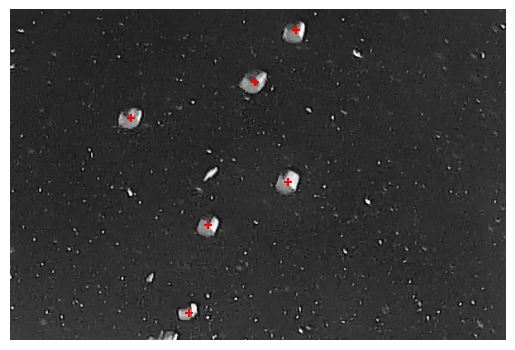

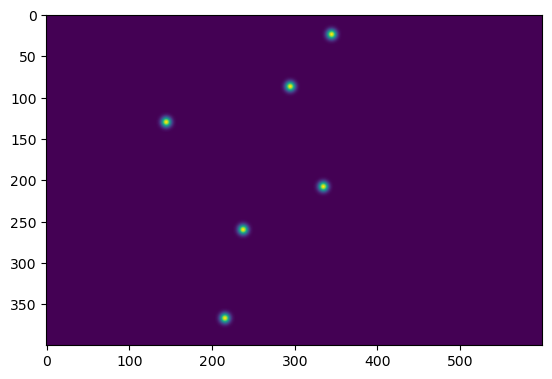

In [113]:
dataset = BubbleDotLabel(transform=rgb2gray)
img, gtdots = dataset[0]
fig, axe = plt.subplots(1, 1)
axe = plot_img_and_dots(axe, img, gtdots)
gtdensity = dots2densitymap(img, gtdots, sigma=4, kernel_radius=4 * 3)
fig, axe = plt.subplots(1,1)
axe.imshow(gtdensity)

Compute SIFT feature

In [114]:
sum(sum(x) for x in gtdensity)

6.000000000000006

In [76]:
sift = cv2.xfeatures2d.SIFT_create()
step_size = 1
kp = [cv2.KeyPoint(x, y, 8) for y in range(0, img.shape[0], step_size) 
                                    for x in range(0, img.shape[1], step_size)]

# img=cv2.drawKeypoints(gray,kp, img)
kp, descriptor = sift.compute(img, kp)

In [91]:
demo = np.reshape(np.arange(256), [16,16]).astype(np.uint8)
step_size = 1
kp = [cv2.KeyPoint(x, y, 12) for y in range(7, 11, step_size) 
                                    for x in range(7, 11, step_size)]

# img=cv2.drawKeypoints(gray,kp, img)
kp, descriptor = sift.compute(demo, kp)
dd = descriptor.T

In [78]:
np.arange(1, 128)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127])